In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from astropy.io import ascii

### Gaussian process regressor(s) for RR Lyrae stars in Koposov+2019
#### Koposov, S. E., Belokurov, V., Li, T. S., et al. 2019, MNRAS, 485, 4726

In [64]:
data = ascii.read("pickle_dump/K19sample.txt")

# Input coordinates needs to be in radians
ra = np.radians(data["ra"])
dec = np.radians(data["dec"])

pmra = data["pmra"]
pmdec = data["pmdec"]
dist= data["Dist"]   # kpc


file_eq = open("pickle_dump/ra-dec-orphan.joblib",'rb')
gp_ra = pickle.load(file_eq)

file_pmra = open("pickle_dump/ra-pmra-orphan.joblib",'rb')
gp_pmra = pickle.load(file_pmra)

file_pmdec = open("pickle_dump/ra-pmdec-orphan.joblib",'rb')
gp_pmdec = pickle.load(file_pmdec)

file_dist = open("pickle_dump/ra-dist-orphan.joblib",'rb')
gp_dist = pickle.load(file_dist)

In [65]:
x_ra = np.linspace(min(ra), max(ra), 1000)

y_dec, sigy_dec = gp_ra.predict(x_ra.reshape(-1,1), return_std=True)
y_pmra, sigy_pmra = gp_pmra.predict(x_ra.reshape(-1,1), return_std=True)
y_pmdec, sigy_pmdec = gp_pmdec.predict(x_ra.reshape(-1,1), return_std=True)
y_dist, sigy_dist = gp_dist.predict(x_ra.reshape(-1,1), return_std=True)

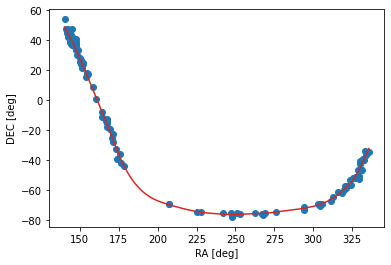

In [66]:
fig, ax = plt.subplots()
ax.plot(np.degrees(x_ra), np.degrees(y_dec), c="C3")
ax.scatter(np.degrees(ra), np.degrees(dec))
ax.set_ylabel("DEC [deg]")
ax.set_xlabel("RA [deg]")
plt.show()

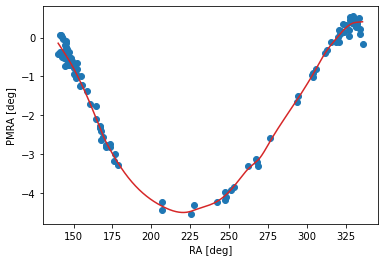

In [67]:
fig, ax = plt.subplots()
ax.plot(np.degrees(x_ra), y_pmra, c="C3")
ax.scatter(np.degrees(ra), pmra)
ax.set_ylabel("PMRA [deg]")
ax.set_xlabel("RA [deg]")
plt.show()

## 20 RR Lyrae stars found in Prudil+2021 used for nonvariable sample

In [68]:
data = ascii.read("pickle_dump/RRLyr20.txt")

# Input coordinates needs to be in radians
ra = np.radians(data["ra"])
dec = np.radians(data["dec"])

pmra = data["pmra"]
pmdec = data["pmdec"]
vsys = data["vsys"]   # kpc


file_eq = open("pickle_dump/ra-dec-p-stable-orphan.joblib",'rb')
gp_ra = pickle.load(file_eq)

file_pmra = open("pickle_dump/ra-pmra-p-stable-orphan.joblib",'rb')
gp_pmra = pickle.load(file_pmra)

file_pmdec = open("pickle_dump/ra-pmdec-p-stable-orphan.joblib",'rb')
gp_pmdec = pickle.load(file_pmdec)

file_vsys = open("pickle_dump/ra-vr-p-stable-orphan.joblib",'rb')
gp_vsys = pickle.load(file_vsys)


In [69]:
x_ra = np.linspace(min(ra), max(ra), 1000)

y_dec, sigy_dec = gp_ra.predict(x_ra.reshape(-1,1), return_std=True)
y_pmra, sigy_pmra = gp_pmra.predict(x_ra.reshape(-1,1), return_std=True)
y_pmdec, sigy_pmdec = gp_pmdec.predict(x_ra.reshape(-1,1), return_std=True)
y_vsys, sigy_vsys = gp_vsys.predict(x_ra.reshape(-1,1), return_std=True)

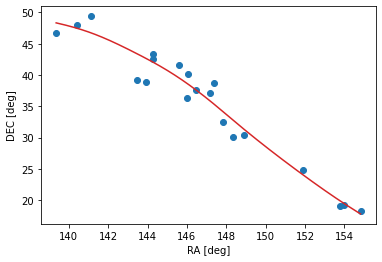

In [70]:
fig, ax = plt.subplots()
ax.plot(np.degrees(x_ra), np.degrees(y_dec), c="C3")
ax.scatter(np.degrees(ra), np.degrees(dec))
ax.set_ylabel("DEC [deg]")
ax.set_xlabel("RA [deg]")
plt.show()

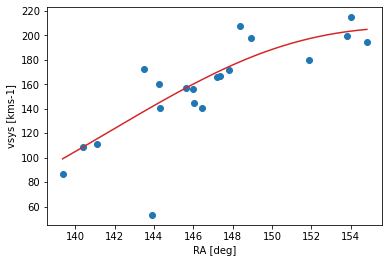

In [72]:
fig, ax = plt.subplots()
ax.plot(np.degrees(x_ra), y_vsys, c="C3")
ax.scatter(np.degrees(ra), vsys)
ax.set_ylabel("vsys [kms-1]")
ax.set_xlabel("RA [deg]")
plt.show()